### Exercise 1
Write a function `factorial` such that `factorial(n)` returns $n!$ for any positive integer $n$

In [7]:
def factorial(n):
    result = 1
    for i in range(2,n+1):
        result = result * i
    return result

for n in range(10):
    print('{0}! = {1}'.format(n, factorial(n)))

0! = 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880


### Exercise 2
Write a function `binomial_rv` such that `binomial_rv(n, p)` generates on draw of $Y \sim Bin(n, p)$

In [13]:
from numpy.random import uniform

def binomial_rv(n, p):
    y = 0
    for i in range(n):
        y = y + (uniform() < p)
    return y

print(binomial_rv(10, 0.5))

5


### Exercise 3
Compute the approximation using Monte Carlo

In [65]:
import numpy as np

n_trials = 10000
n_in_circle = 0
for i in range(n_trials):
    a, b = uniform(), uniform()
    if a**2 + b**2 < 1: 
        n_in_circle += 1

# Area of quarter circle = pi * r^2 / 4 = pi/4
pi = n_in_circle/n_trials * 4;

print('PI estimated with {0} trials = {1}'.format(n_trials, pi))
    
    

PI estimated with 10000 trials = 3.1232


### Exercise 4
Write a program that prints one realization of the following random device:
- Flip an unbiased coin 10 times
- If 3 consecutive heads occur one or more times within this sequence pay one dollar
- if not, pay nothing

In [67]:
from numpy.random import uniform

def gen_payoff():
    n_flips = 10
    n_consecutive = 3
    flips = uniform(0, 1, n_flips) < 0.5
    heads_count = 0
    for i in range(n_flips):
        U = uniform()
        heads_count = heads_count + 1 if U else 0
        if heads_count == n_consecutive:
            return 1
    return 0

print('Payoff = {0}'.format(gen_payoff()))

Payoff = 1


### Exercise 5
Simulate and plot the correlated time series,
$$
x_{t+1} = \alpha x_{t} + \epsilon_{t+1}\quad\text{where}\quad x_0 = 0\quad\text{and}\quad t = 0, \ldots, T
$$
The sequence of shocks $\{\epsilon_t\}$ is assumed to be iid and standard normal.

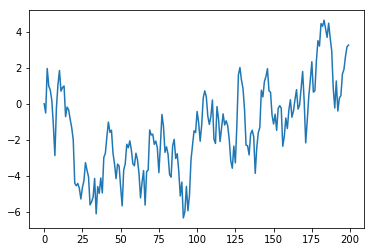

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def gen_ar1(alpha, noise_generator, x0, T):
    x = np.ndarray(T)
    x[0] = x0
    for i in range(1, T):
        x[i] = alpha * x[i-1] + noise_generator()
    return x

plt.plot(gen_ar1(0.9, np.random.randn, 0, 200))
plt.show()

### Exercise 6
Plot three simulated time series one for each of the cases: $\alpha \in \{0, 0.8, 0.98\}$

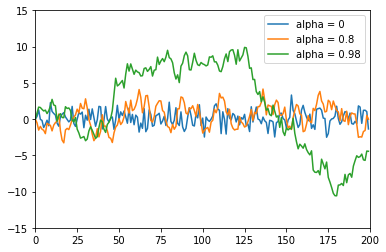

In [64]:
# Assume Exercise 5 code has already been run
alphas = [0, 0.8, 0.98]

for alpha in alphas:
    x = gen_ar1(alpha, np.random.randn, 0, 200)
    plt.plot(x, label='alpha = {0}'.format(alpha))
plt.legend()
plt.ylim([-15, 15])
plt.xlim([0, 200])
plt.show()